In [3]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import json
import string

In [32]:
def define_plot_fonts():
    fm.fontManager.addfont('../references/cmunorm.ttf')
    matplotlib.rc('xtick', labelsize=14) 
    matplotlib.rc('ytick', labelsize=14)
    matplotlib.rcParams['font.family'] = 'CMU Concrete'

In [5]:
rz = pd.read_parquet('../data/RZ_processed.parquet')

In [14]:
df = pd.read_csv('../data/processed_data.tsv', sep='\t', encoding='utf8')
df.doc_date = pd.to_datetime(df.doc_date)
df.origin_date = pd.to_datetime(df.origin_date)
df['doc_year'] = df.doc_date.dt.year

In [ ]:

 
color = 'tab:red'
ax1.set_xlabel('X-axis')
ax1.set_ylabel('Y1-axis', color = color)
ax1.plot(x, dataset_1, color = color)
ax1.tick_params(axis ='y', labelcolor = color)
 
# Adding Twin Axes to plot using dataset_2
ax2 = ax1.twinx()
 
color = 'tab:green'
ax2.set_ylabel('Y2-axis', color = color)
ax2.plot(x, dataset_2, color = color)
ax2.tick_params(axis ='y', labelcolor = color)

In [20]:
df.groupby('doc_year')['doc_year'].count().max()

6085

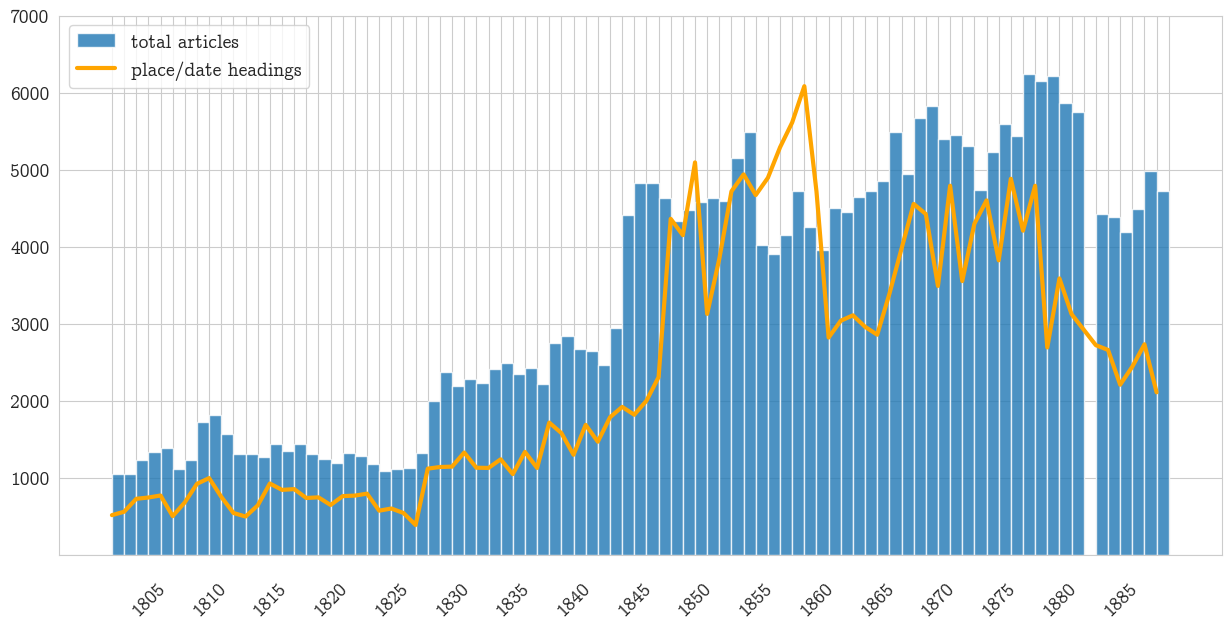

In [37]:
def distribution_histogram(rz):
    
    define_plot_fonts()
    
    fig, ax = plt.subplots(figsize=(15,7))
    
    rz.year.hist(ax=ax, bins=range(min(rz.year), max(rz.year+2)), alpha=0.8, label='total articles')
    df.groupby('doc_year')['doc_year'].count().plot(ax=ax, color='orange', linewidth=3, label='place/date headings')

    plt.yticks(fontsize=14)
    plt.xlabel(None)
    ax.set_xticks(ticks=range(1802, 1890), labels=[num if num%5==0 else '' for num in range(1802,1890)])
    plt.tick_params(axis='x', size=14, rotation=45)
    
    ax.set_yticks(ticks=range(0,7001,1000), labels=['', 1000, 2000, 3000, 4000, 5000, 6000, 7000])
    ax.grid(visible=True, which='both')
    
    plt.legend(fontsize=14)

    sns.set_style(style='whitegrid')
    
    
    #plt.savefig('../references/memoire/images/articles_histogram.pdf', bbox_inches='tight')

    plt.show()
    
distribution_histogram(rz)

<AxesSubplot: xlabel='year'>

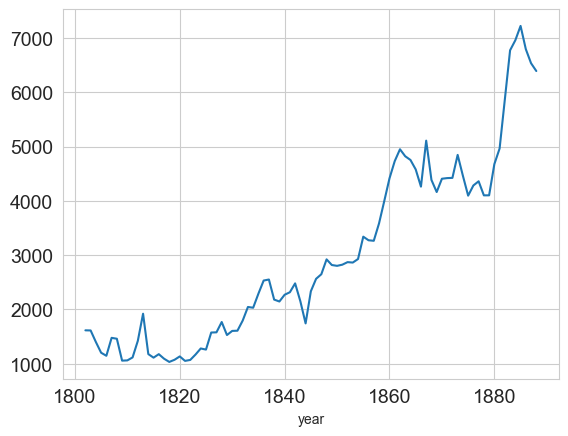

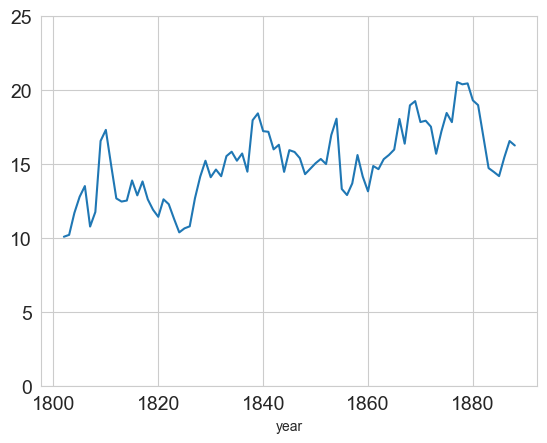

In [59]:
art_per_yr = rz.groupby('year')['year'].count()
num_per_yr = rz.groupby('year')['date'].apply(lambda x: len(x.unique()))

(art_per_yr / num_per_yr).plot()
plt.ylim(0, 25)
plt.show()

In [101]:
long_articles = rz[rz.text_len > 20000]

In [110]:
df = pd.read_csv('../data/processed_data.tsv', sep='\t', encoding='utf8')

In [111]:
df

,doc_id,doc_date,placename,day,day2,month,month2,origin_year,start,end,origin_date,delta
0,0,1802-01-01,St. Petersburg,20,NaN,12,NaN,NaN,0,32,1801-12-20,12
1,1,1802-01-01,Paris,18,NaN,12,NaN,NaN,0,27,1801-12-06,26
2,2,1802-01-01,Haag,22,NaN,12,NaN,NaN,0,27,1801-12-10,22
3,3,1802-01-01,Zürich,16,NaN,12,NaN,NaN,0,28,1801-12-04,28
4,4,1802-01-01,Wien,19,NaN,12,NaN,NaN,0,26,1801-12-07,25
...,...,...,...,...,...,...,...,...,...,...,...,...
226080,289703,1888-12-31,London,10,29.0,1,12.0,NaN,1517,1552,1888-12-29,2
226081,289703,1888-12-31,Belgrad,10,29.0,1,12.0,NaN,1751,1787,1888-12-29,2
226082,289703,1888-12-31,New York,9,28.0,1,12.0,NaN,2009,2044,1888-12-28,3
226083,289704,1888-12-31,St. Petersburg,31,NaN,12,NaN,NaN,1560,1586,1888-12-31,0


In [149]:
df[df.delta > 1000]

,doc_id,doc_date,placename,day,day2,month,month2,origin_year,start,end,origin_date,delta
18842,34408,1828-05-31,Riga,31,NaN,5,NaN,1823.0,561,583,1823-05-31,1827
18868,34450,1828-06-07,Riga,6,NaN,6,NaN,1823.0,518,540,1823-06-06,1828
26083,48284,1834-06-04,Wien,2,NaN,10,NaN,1807.0,857,883,1807-09-20,9754
26084,48285,1834-06-04,Prag,20,NaN,10,NaN,1807.0,873,900,1807-10-08,9736
30381,56715,1838-01-03,Riga,3,NaN,1,NaN,1833.0,2016,2040,1833-01-03,1826
...,...,...,...,...,...,...,...,...,...,...,...,...
220615,281880,1887-05-22,St. Petersburg,22,NaN,1,NaN,1876.0,8817,8848,1876-01-22,4138
221357,282812,1887-07-29,Riga,25,NaN,7,NaN,1837.0,234,253,1837-07-25,18266
223155,285442,1888-02-05,Riga,5,NaN,2,NaN,1833.0,1845,1866,1833-02-05,20088
223861,286285,1888-04-07,Berlin,9,NaN,11,NaN,1871.0,948,976,1871-10-28,6006


In [151]:
f = open('../temp/delete_this.txt', 'a', encoding='utf8')

In [152]:
f.write('1st line')

8

In [157]:
len(df.loc[(df.delta > 0) & (df.delta < 350)])

202509

<AxesSubplot: xlabel='year'>

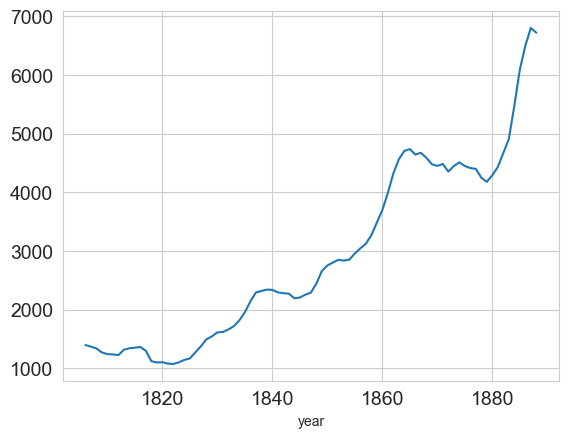

In [73]:
rz[rz.text_len < 50000].groupby('year')['text_len'].mean().rolling(5).mean().plot()

<AxesSubplot: >

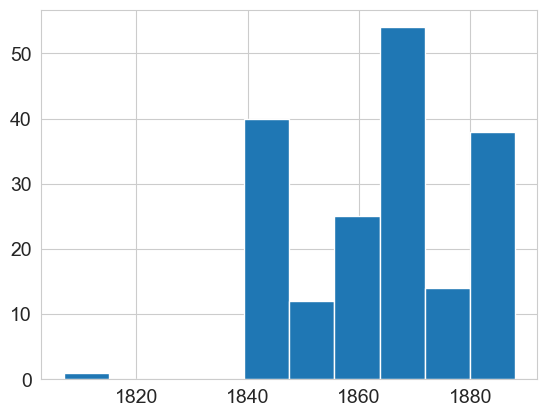

In [94]:
rz.year[rz.heading.str.contains('Literatur')].hist()